# Notebook for Visualizing English Letter Dataset

In [1]:
# standard library
import os
import json

# local classes
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
os.chdir('letter_data')

### Loading Files into Graph Classes

In [2]:
def json_to_graph(json_data):    
    graph = Graph()
    graph.name = json_data['gxl']['graph'][0]['$']['id'][0]
    
    # Extract X, Y coordinates from 'node' elements.
    for node_data in json_data['gxl']['graph'][0]['node']:
        node_id = int(node_data['$']['id'][1:])
        x_coord = float(node_data['attr'][0]['float'][0])
        y_coord = float(node_data['attr'][1]['float'][0])
        graph.addNode(node_id, x_coord, y_coord)

    # Check if edges exist in graph (not just nodes).
    #if 'edge ' in json_data['gxl']['graph'][0]:
        
    # Extract edges from 'edge' elements.
    for i, edge_data in enumerate(json_data['gxl']['graph'][0]['edge'], 1):
        from_node = int(edge_data['$']['from'][1:])
        to_node = int(edge_data['$']['to'][1:])
        graph.connectTwoNodes(i, from_node, to_node)
        
    return graph, graph.name

# Check if input correct return True for 0 distance between two identical graphs.
def is_valid(json_graph):
    g1, n1 = json_to_graph(json_graph)
    g1.id = 0
    g2, n2 = json_to_graph(json_graph)
    g2.id = 1
    fsg = FreeSpaceGraph(g1, g2, 0.001)
    check1 = fsg.DFSTraversalDist()

    

In [3]:
# Internet function (NOT MINE) to tabulate dict. 
def print_dict_in_grid(dictionary, n, m):
    items = list(dictionary.items())
    total_items = len(items)
    iter_items = iter(items)
    
    for row in range(n):
        for col in range(m):
            if total_items > 0:
                key, value = next(iter_items)
                print(f'{key}: {len(value)}', end='\t')
                total_items -= 1
            else:
                break
        print()
    if total_items > 0:
        print("\nWarning: Not all items were printed. Increase grid dimensions.")

In [4]:
# Bad edge graphs
bad_filenames = list()

In [5]:
file_names = os.listdir("LOW")
graphs = dict()

for index, file_name in enumerate(file_names):
    if file_name.endswith('.json'):
        try:         
            json_graph = json.load(open(f"LOW/{file_name}"))
            
            is_valid(json_graph)
            
            graph, name = json_to_graph(json_graph)
            graph.id = index           
            if name in graphs.keys():
                graphs[name].append(graph)
            else:
                graphs[name] = [graph]
                
        except Exception as error: 
            print(f"AssertionError {error}: Fail to parse {file_name}.")
            
            # Bad edge graphs
            if 'edge' in str(error):
                bad_filenames.append(file_name)


AssertionError 'edge': Fail to parse VP1_0125.json.
AssertionError 'edge': Fail to parse LP1_0103.json.
AssertionError 'gxl': Fail to parse test.json.
AssertionError 'edge': Fail to parse LP1_0136.json.
AssertionError 'edge': Fail to parse LP1_0086.json.
AssertionError 'edge': Fail to parse LP1_0068.json.
AssertionError 'edge': Fail to parse VP1_0086.json.
AssertionError 'gxl': Fail to parse validation.json.
AssertionError 'gxl': Fail to parse train.json.
AssertionError 'edge': Fail to parse IP1_0110.json.


In [6]:
print("no. bad graph:", len(bad_filenames))
for i in bad_filenames:
    print(i)

no. bad graph: 7
VP1_0125.json
LP1_0103.json
LP1_0136.json
LP1_0086.json
LP1_0068.json
VP1_0086.json
IP1_0110.json


In [7]:
print_dict_in_grid(graphs, 3, 5)

T: 150	A: 150	X: 150	H: 150	Y: 150	
I: 149	E: 150	N: 150	L: 146	M: 150	
V: 148	Z: 150	F: 150	W: 150	K: 150	


### Saving Visualizations to SVG 

In [27]:
# Sample
g1, g2 = graphs['Z'][11], graphs['E'][44]

# comparing graph two and graph one
binary_search = BinarySearch(g1, g2, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)

# comparing graph one and graph two
binary_search = BinarySearch(g2, g1, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)

Computing graph_2 by graph_1 (traversed) minimum epsilon: 1.171875
Computing graph_1 by graph_2 (traversed) minimum epsilon: 1.171875


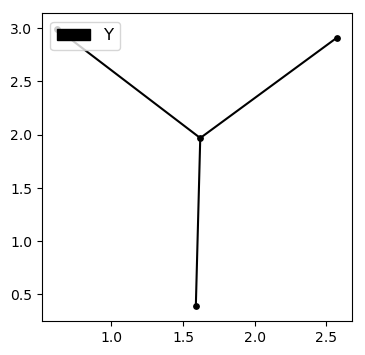

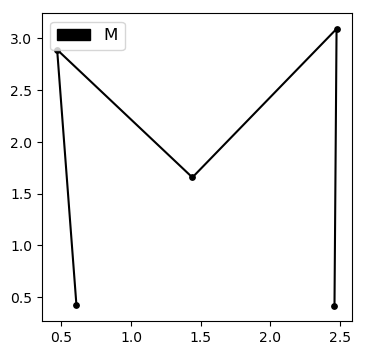

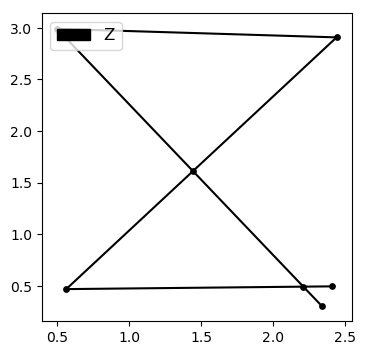

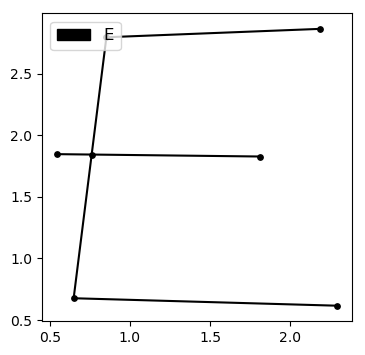

In [9]:
samples = (graphs['Y'][1],
            graphs['M'][1],
            graphs['Z'][0],
            graphs['E'][0]
            )

for i in range(4):
    fig, ax = samples[i].Plot2MatPlotLib(plot=False, legend_fontsize='large') 
    fig.set_size_inches(4, 4) 
    fig.savefig(f"../images/svgs/letter_geometric_graph_{i+1}.svg", format='svg')
